# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
**Gruppenmitglieder:** Molignini Alessia, Keel Noëlle, Stettler Sara
### 1.1 Titel: 
- "Übergewicht in verschiedenen Ländern"
### 1.2 Fragestellung:
- "Welche drei Länder zeigen im Zeitraum von 1996 bis 2016 die grösste Zunahme der Prävalenz von Übergewicht in der Gesamtbevölkerung, unabhänig vom Geschlecht?"
- "Wo steht die Schweiz in diesem Vergleich?"
- "Welche Unterschiede gibt es in diesen vier Ländern zwischen Mann und Frau?"
### 1.3 Datenquelle(n):
**Quellen:** 
- https://ourworldindata.org/grapher/obesity-in-men-vs-obesity-in-women
- https://ourworldindata.org/obesity (4. Darstellung,"What share of adults are obese?")

Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [65]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [66]:
pd.set_option('display.max_rows', 10) 

In [67]:
df = pd.read_csv('share-of-adults-defined-as-obese.csv')

df

,Entity,Code,Year,"Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+ years"
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5
...,...,...,...,...
8269,Zimbabwe,ZWE,2012,11.1
8270,Zimbabwe,ZWE,2013,11.3
8271,Zimbabwe,ZWE,2014,11.6
8272,Zimbabwe,ZWE,2015,11.9


In [68]:
df = pd.read_csv('share-of-adults-defined-as-obese.csv', skiprows=1,
                 names=['Land','Kürzel','Jahr','Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'])

df.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_18+_unabhängig_Geschlecht
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


In [69]:
# lade hier deine Daten
df = pd.read_csv('obesity-in-men-vs-obesity-in-women.csv')

df.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

,Entity,Code,Year,"Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: male - Age group: 18+ years","Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: female - Age group: 18+ years",World regions according to OWID
0,Afghanistan,AFG,1975,0.2,0.8,NaN
1,Afghanistan,AFG,1976,0.2,0.8,NaN
2,Afghanistan,AFG,1977,0.2,0.9,NaN
3,Afghanistan,AFG,1978,0.2,0.9,NaN
4,Afghanistan,AFG,1979,0.3,1.0,NaN


In [70]:
df = pd.read_csv('obesity-in-men-vs-obesity-in-women.csv', skiprows=1,
                 names=['Land','Kürzel','Jahr','Übergewicht_Prävalenz_Männer_18+','Übergewicht_Prävalenz_Frauen_18+','Weltregionen_gemäss_OWID'])

df.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+,Weltregionen_gemäss_OWID
0,Afghanistan,AFG,1975,0.2,0.8,NaN
1,Afghanistan,AFG,1976,0.2,0.8,NaN
2,Afghanistan,AFG,1977,0.2,0.9,NaN
3,Afghanistan,AFG,1978,0.2,0.9,NaN
4,Afghanistan,AFG,1979,0.3,1.0,NaN


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [71]:
df.dtypes

Land                                 object
Kürzel                               object
Jahr                                  int64
Übergewicht_Prävalenz_Männer_18+    float64
Übergewicht_Prävalenz_Frauen_18+    float64
Weltregionen_gemäss_OWID             object
dtype: object

In [72]:
df_pivot = df.pivot(
    index='Land', 
    columns='Jahr', 
    values='Übergewicht_Prävalenz_Männer_18+')
df_pivot.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2023
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,...,2.0,2.1,2.2,2.4,2.5,2.7,2.8,3.0,3.2,NaN
Africa (WHO),0.6,0.6,0.6,0.7,0.7,0.7,0.8,0.8,0.9,1.0,...,3.8,4.0,4.2,4.4,4.6,4.9,5.1,5.3,5.6,NaN
Aland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.4,4.6,4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.3,...,16.1,16.8,17.4,18.1,18.8,19.5,20.2,20.9,21.6,NaN
Algeria,2.8,2.9,3.1,3.2,3.4,3.6,3.8,4.0,4.3,4.5,...,14.6,15.2,15.8,16.5,17.1,17.8,18.5,19.2,19.9,NaN


In [73]:
df_pivot = df.pivot_table(
    index='Land', 
    columns='Jahr', 
    values=['Übergewicht_Prävalenz_Männer_18+', 'Übergewicht_Prävalenz_Frauen_18+'])
df_pivot.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

Übergewicht_Prävalenz_Frauen_18+                                \
Jahr                                       1975  1976  1977  1978  1979  1980   
Land                                                                            
Afghanistan                                 0.8   0.8   0.9   0.9   1.0   1.1   
Africa (WHO)                                3.3   3.5   3.6   3.7   3.9   4.0   
Albania                                     8.6   8.8   8.9   9.1   9.3   9.5   
Algeria                                    10.7  11.1  11.4  11.8  12.2  12.7   
Americas (WHO)                             11.5  11.9  12.2  12.6  12.9  13.3   

                                        ... Übergewicht_Prävalenz_Männer_18+  \
Jahr            1981  1982  1983  1984  ...                             2007   
Land                                    ...                                    
Afghanistan      1.1   1.2   1.3   1.4  ...                              1.8   
Africa (WHO)     4.2   4.4   4.6   4.8  ...                              3.7   
Albania          9.7   9.9  10.1  10.3  ...                             15.5   
Algeria         13.1  13.6  14.1  14.6  ...                             14.0   
Americas (WHO)  13.7  14.1  14.5  14.9  ...                             21.1   

                                                                      
Jahr            2008  2009  2010  2011  2012  2013  2014  2015  2016  
Land                                                                  
Afghanistan      2.0   2.1   2.2   2.4   2.5   2.7   2.8   3.0   3.2  
Africa (WHO)     3.8   4.0   4.2   4.4   4.6   4.9   5.1   5.3   5.6  
Albania         16.1  16.8  17.4  18.1  18.8  19.5  20.2  20.9  21.6  
Algeria         14.6  15.2  15.8  16.5  17.1  17.8  18.5  19.2  19.9  
Americas (WHO)  21.6  22.2  22.7  23.2  23.7  24.3  24.8  25.4  25.9  

[5 rows x 84 columns]

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

### 3.1 Analyse Länder

In [74]:
# Wie viele vers. Länder haben wir
Anzahl_Länder = len(df['Land'].unique())
print('Anzahl verschiedener Länder:', Anzahl_Länder)

Anzahl verschiedener Länder: 278


In [75]:
# Welches Land hat die meisten und wenigsten Datenpunkte?
df['Land'].value_counts()

Land
Afghanistan         43
Panama              43
Marshall Islands    43
Mauritania          43
Mauritius           43
                    ..
Saint Barthelemy     1
Christmas Island     1
Cocos Islands        1
Reunion              1
Hong Kong            1
Name: count, Length: 278, dtype: int64

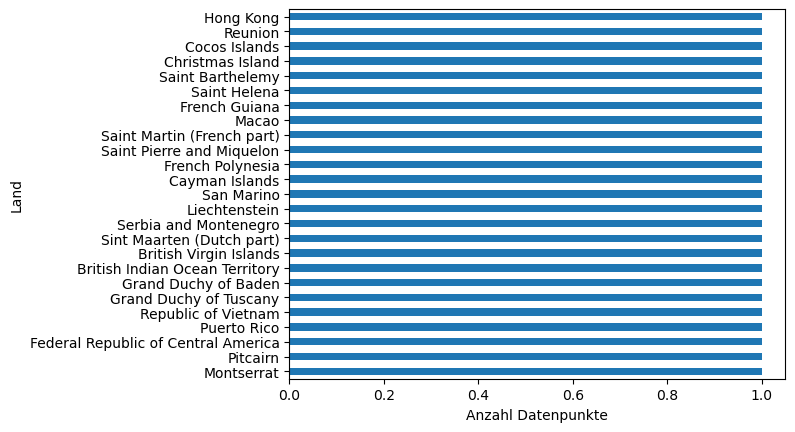

In [76]:
# tail = die Länder mit wenigsten Datenpunkte
# kind = kann angepasst werden, je nach Grafik, die man will
df['Land'].value_counts().tail(25).plot(
    kind='barh', 
    xlabel='Anzahl Datenpunkte'); 

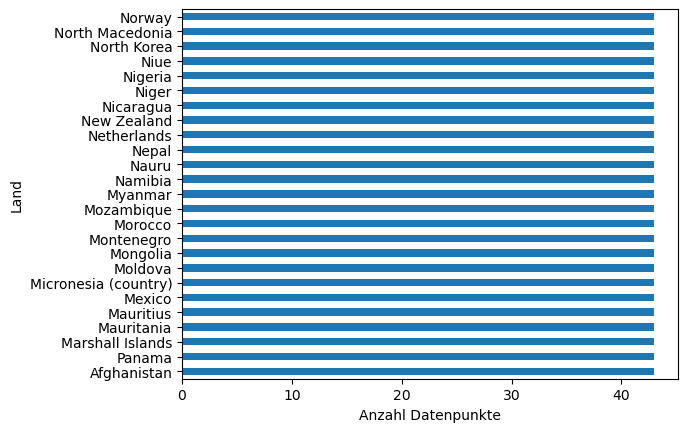

In [77]:
# head = die Länder mit meisten Datenpunkten
df['Land'].value_counts().head(25).plot(
    kind='barh', 
    xlabel='Anzahl Datenpunkte'); 

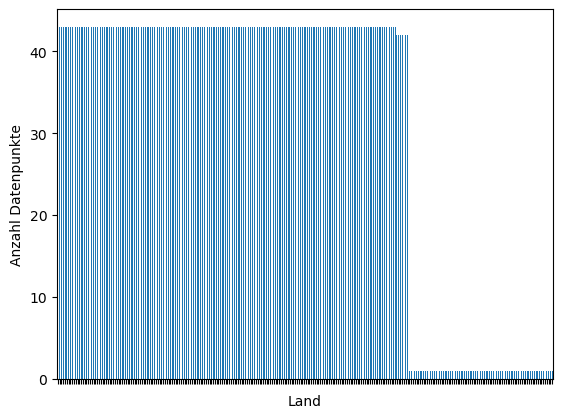

In [78]:
Graph_1 = df['Land'].value_counts().plot(kind='bar', ylabel='Anzahl Datenpunkte')
Graph_1.set_xticklabels([]); # löscht x-ticks labels (Ländernamen bei x Achse)


In [79]:
Anzahl_pro_Land = df.groupby('Land').size()
Anzahl_43 = Anzahl_pro_Land[Anzahl_pro_Land == 43]
print(Anzahl_43)

Land
Afghanistan    43
Albania        43
Algeria        43
Andorra        43
Angola         43
               ..
Venezuela      43
Vietnam        43
Yemen          43
Zambia         43
Zimbabwe       43
Length: 190, dtype: int64


In [80]:
Anzahl_42 = Anzahl_pro_Land[Anzahl_pro_Land == 42]

print(Anzahl_42)

Land
Africa (WHO)                   42
Americas (WHO)                 42
Eastern Mediterranean (WHO)    42
Europe (WHO)                   42
South-East Asia (WHO)          42
Sudan (former)                 42
Western Pacific (WHO)          42
dtype: int64


In [81]:
Anzahl_1 = Anzahl_pro_Land[Anzahl_pro_Land == 1]

print(Anzahl_1)

Land
Aland Islands              1
American Samoa             1
Anguilla                   1
Aruba                      1
Austria-Hungary            1
                          ..
West Germany               1
Western Sahara             1
Yemen Arab Republic        1
Yemen People's Republic    1
Yugoslavia                 1
Length: 81, dtype: int64


### 3.2 Analyse Kürzel

In [82]:
Anzahl_Kürzel = len(df['Kürzel'].unique())

print('Anzahl verschiedener Landeskürzel:', Anzahl_Kürzel)

Anzahl verschiedener Landeskürzel: 258


In [83]:
df['Kürzel'].value_counts()

Kürzel
AFG         43
MEX         43
MDA         43
MNG         43
MNE         43
            ..
GIB          1
SXM          1
OWID_ERE     1
MSR          1
PRI          1
Name: count, Length: 257, dtype: int64

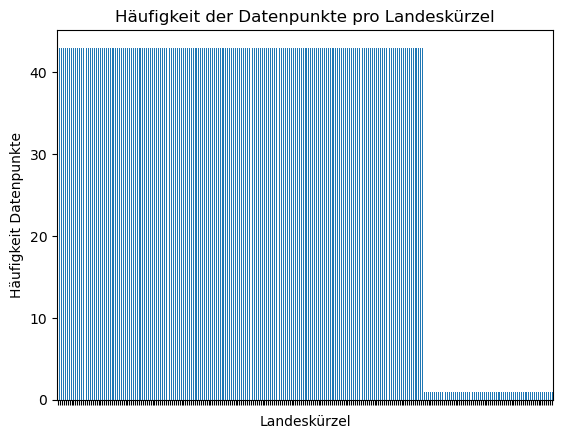

In [96]:
Graph_2 = df['Kürzel'].value_counts().plot(
    kind='bar', 
    xlabel='Landeskürzel', 
    ylabel='Häufigkeit Datenpunkte',
    title='Häufigkeit der Datenpunkte pro Landeskürzel')

Graph_2.set_xticklabels([]);

### 3.3 Analyse Jahr

In [85]:
Anzahl_Jahr = len(df['Jahr'].unique())

print('Anzahl verschiedener Jahreszahlen:', Anzahl_Jahr)

Anzahl verschiedener Jahreszahlen: 43


In [86]:
df['Jahr'].value_counts().sort_values()

Jahr
1975    197
1985    197
1977    197
1978    197
1979    197
       ... 
2013    197
2014    197
2015    197
2008    197
2023    271
Name: count, Length: 43, dtype: int64

In [87]:
df['Jahr'].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
       ... 
2013    197
2014    197
2015    197
2016    197
2023    271
Name: count, Length: 43, dtype: int64

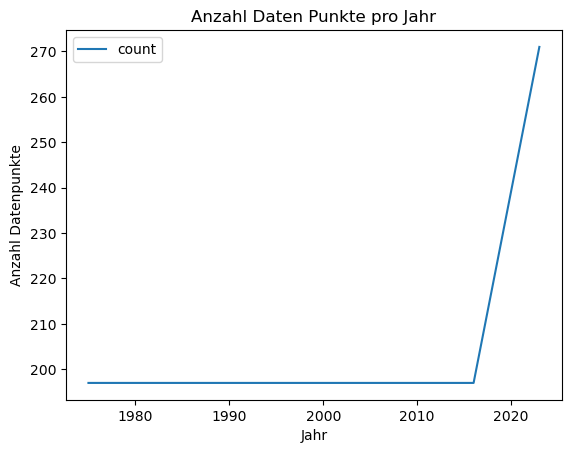

In [88]:
Graph_3 = df['Jahr'].value_counts().sort_index().plot(
    title = 'Anzahl Daten Punkte pro Jahr',
    kind='line',
    ylabel='Anzahl Datenpunkte'
)
Graph_3.legend(); 
# Legende umbennen!!

### 3.4 Analyse Prävalenz 

In [89]:
df.describe().round(2)

,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+
count,8545.00,8274.00,8274.00
mean,1996.37,9.26,15.42
std,12.86,8.93,11.25
min,1975.00,0.10,0.20
25%,1985.00,2.00,6.50
50%,1996.00,6.90,13.90
75%,2007.00,14.10,21.40
max,2023.00,58.70,63.30


In [90]:
Summe_Frauen = round(df['Übergewicht_Prävalenz_Frauen_18+'].sum(),2)
Mittelwert_Frauen = round(df['Übergewicht_Prävalenz_Frauen_18+'].mean(),2)
Median_Frauen = round(df['Übergewicht_Prävalenz_Frauen_18+'].median(),2)
Standardabweichung_Frauen = round(df['Übergewicht_Prävalenz_Frauen_18+'].std(),2)

In [91]:
print('Mittelwert:', Mittelwert_Frauen, 'Prozent der Frauen sind übergewichtig')
print('Summe:', Summe_Frauen)
print('Median:', Median_Frauen)
print('Standardabweichung:', Standardabweichung_Frauen)

Mittelwert: 15.42 Prozent der Frauen sind übergewichtig
Summe: 127556.3
Median: 13.9
Standardabweichung: 11.25


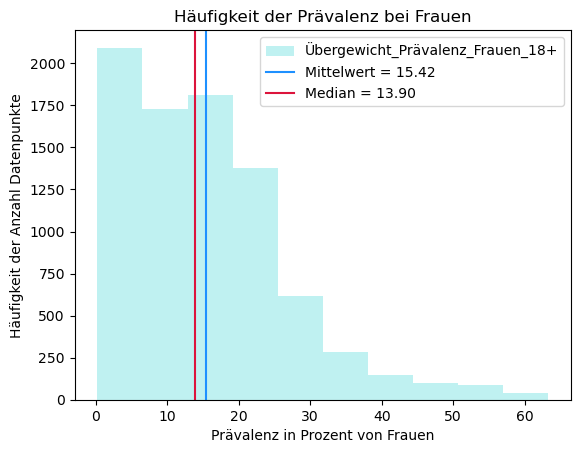

In [92]:
Histo_Frau = df['Übergewicht_Prävalenz_Frauen_18+'].plot(
    color = 'paleturquoise',
    kind = 'hist',
    bins = 10, 
    alpha = 0.8,
    ylabel = 'Häufigkeit der Anzahl Datenpunkte',
    xlabel = 'Prävalenz in Prozent von Frauen',
    title = 'Häufigkeit der Prävalenz bei Frauen'
    )

Histo_Frau.axvline(x=df['Übergewicht_Prävalenz_Frauen_18+'].mean(), 
                   color = 'dodgerblue',
                   label = f'Mittelwert = {Mittelwert_Frauen:.2f}')

Histo_Frau.axvline(x=df['Übergewicht_Prävalenz_Frauen_18+'].median(), 
                   color = 'crimson',
                   label = f'Median = {Median_Frauen:.2f}')

Histo_Frau.legend(); 
# zählt wie oft kommt diese Prävalenz ion allen Ländern in allen Jahren vor

In [93]:
Summe_Männer = round(df['Übergewicht_Prävalenz_Männer_18+'].sum(),2)
Mittelwert_Männer = round(df['Übergewicht_Prävalenz_Männer_18+'].mean(),2)
Median_Männer = round(df['Übergewicht_Prävalenz_Männer_18+'].median(),2)
Standardabweichung_Männer = round(df['Übergewicht_Prävalenz_Männer_18+'].std(),2)

In [94]:
print('Mittelwert:', Mittelwert_Männer, 'Prozent der Männer sind übergewichtig')
print('Summe:', Summe_Männer)
print('Median:', Median_Männer)
print('Standardabweichung:', Standardabweichung_Männer)

Mittelwert: 9.26 Prozent der Männer sind übergewichtig
Summe: 76634.1
Median: 6.9
Standardabweichung: 8.93


Die Breite eines Balkens beträgt: 5.86


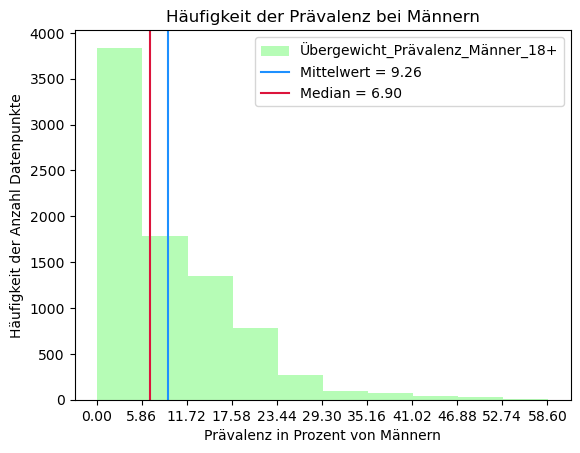

In [99]:
Histo_Mann = df['Übergewicht_Prävalenz_Männer_18+'].plot(
    color = 'palegreen',
    title = 'Häufigkeit der Prävalenz bei Männern',
    kind = 'hist',
    bins = 10, 
    alpha = 0.7,
    ylabel = 'Häufigkeit der Anzahl Datenpunkte',
    xlabel = 'Prävalenz in Prozent von Männern',
    )

Histo_Mann.axvline(x=df['Übergewicht_Prävalenz_Männer_18+'].mean(), 
                   color = 'dodgerblue',
                   label = f'Mittelwert = {Mittelwert_Männer:.2f}')

Histo_Mann.axvline(x=df['Übergewicht_Prävalenz_Männer_18+'].median(), 
                   color = 'crimson',
                   label = f'Median = {Median_Männer:.2f}')

plt.xticks(np.arange(0,60,5.86))

Histo_Mann.legend(); 

#Code um Balkenbreite herauszufinden, um Histogramm x-Achsenbeschriftung besser
bar_width = Histo_Mann.patches[0].get_width()
print(f"Die Breite eines Balkens beträgt: {bar_width}")

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

